In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import numpy as np
import pytz
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
plt.style.use('_mpl-gallery')

In [53]:
# Pilot Group

pilotParticipants = [14,16,18,13] 
startCoordination = datetime.datetime(2023,8,21,0,0,0,0,tzinfo=pytz.timezone('UTC'))

# Define the time range for nighttime shading - 7pm to 5am
nighttime_start = 19
nighttime_end = 5

bookings = pd.read_json("../chatbot_data/bookings/bookings12-9-23.json")

bookings = pd.DataFrame(bookings.fields.values.tolist())

bookings['start'] = pd.to_datetime(bookings['start'],infer_datetime_format=True)
bookings['created_at'] = pd.to_datetime(bookings['created_at'],infer_datetime_format=True)
bookings['modified_at'] = pd.to_datetime(bookings['modified_at'],infer_datetime_format=True)

pilotBookings = bookings.loc[bookings['user'].isin(pilotParticipants)] 
pilotBookings = pilotBookings.loc[pilotBookings['start']>= startCoordination ] 
pilotBookings

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at
2,2023-08-24 19:00:00+00:00,5400,washing_and_drying,None,yes,0.539100,13,electricity_consumption,14,2023-08-22 20:50:20.648000+00:00,2023-08-22 20:50:20.648000+00:00
3,2023-08-23 18:00:00+00:00,10800,washing_and_drying,None,yes,1.324720,12,electricity_consumption,13,2023-08-23 16:33:59.666000+00:00,2023-08-23 08:32:34.290000+00:00
4,2023-08-25 09:00:00+00:00,3600,washing_and_drying,None,yes,0.730841,15,electricity_consumption,16,2023-08-24 16:32:35.153000+00:00,2023-08-24 16:32:35.153000+00:00
5,2023-08-27 17:00:00+00:00,3600,dishwasher,None,yes,1.229527,15,electricity_consumption,16,2023-08-24 16:38:47.653000+00:00,2023-08-24 16:38:47.653000+00:00
7,2023-08-26 09:00:00+00:00,1800,washing_and_drying,None,yes,0.235443,17,electricity_consumption,18,2023-08-25 19:03:58.215000+00:00,2023-08-25 19:03:58.215000+00:00
11,2023-08-26 12:00:00+00:00,7200,dishwasher,None,yes,2.459053,15,electricity_consumption,16,2023-08-26 11:44:59.874000+00:00,2023-08-26 11:44:59.874000+00:00
20,2023-08-30 12:00:00+00:00,1800,dishwasher,None,yes,0.614763,15,electricity_consumption,16,2023-08-29 15:24:55.101000+00:00,2023-08-29 15:24:55.101000+00:00
21,2023-08-29 16:00:00+00:00,10800,washing_and_drying,None,yes,1.324720,12,electricity_consumption,13,2023-08-29 15:45:42.488000+00:00,2023-08-29 15:45:42.488000+00:00
22,2023-08-29 16:00:00+00:00,1800,hob,None,yes,0.197686,12,electricity_consumption,13,2023-08-29 15:48:23.771000+00:00,2023-08-29 15:48:23.771000+00:00
24,2023-08-30 16:00:00+00:00,10800,washing_and_drying,None,yes,1.324720,12,electricity_consumption,13,2023-08-30 09:29:35.142000+00:00,2023-08-30 09:23:30.961000+00:00


In [8]:
# pilot_group_consumption = pd.read_json("../chatbot_data/consumption/group_zero/all_group.json")
consumption105Barbara = pd.read_json("../chatbot_data/consumption/group_zero/sensor_105_barb.json")
consumption109Alla = pd.read_json("../chatbot_data/consumption/group_zero/sensor_109_alla.json")
consumption111Chris = pd.read_json("../chatbot_data/consumption/group_zero/sensor_111_chris.json")
consumptionSonia110 = pd.read_json("../chatbot_data/consumption/group_zero/sensor_110_sonia.json")

# pilot_group_consumption = pilot_group_consumption["readings"][0]
consumption105Barbara = consumption105Barbara["readings"][0]
consumption109Alla = consumption109Alla["readings"][0]
consumption111Chris = consumption111Chris["readings"][0]
consumptionSonia110 = consumptionSonia110["readings"][0]

# pilot_group_consumption = pd.DataFrame.from_dict(pilot_group_consumption, orient='columns')
consumption105Barbara = pd.DataFrame.from_dict(consumption105Barbara, orient='columns')
consumption109Alla = pd.DataFrame.from_dict(consumption109Alla, orient='columns')
consumption111Chris = pd.DataFrame.from_dict(consumption111Chris, orient='columns')
consumptionSonia110 = pd.DataFrame.from_dict(consumptionSonia110, orient='columns')

# pilot_group_consumption['time'] = pd.to_datetime(pilot_group_consumption['time'],infer_datetime_format=True)
consumption105Barbara['time'] = pd.to_datetime(consumption105Barbara['time'],infer_datetime_format=True)
consumption109Alla['time'] = pd.to_datetime(consumption109Alla['time'],infer_datetime_format=True)
consumption111Chris['time'] = pd.to_datetime(consumption111Chris['time'],infer_datetime_format=True)
consumptionSonia110['time'] = pd.to_datetime(consumptionSonia110['time'],infer_datetime_format=True)

# pilot_group_consumption['value'] = pilot_group_consumption['value']*0.23*0.64*0.9
consumption105Barbara['value'] = consumption105Barbara['value']*0.23*0.64*0.9
consumption109Alla['value'] = consumption109Alla['value']*0.23*0.64*0.9
consumption111Chris['value'] = consumption111Chris['value']*0.23*0.64*0.9
consumptionSonia110['value'] = consumptionSonia110['value']*0.23*0.64*0.9

# pilot_group_consumption_coordination = pilot_group_consumption[ pilot_group_consumption['time'] > startCoordination ]
consumption105Barbara_coordination = consumption105Barbara[ consumption105Barbara['time'] > startCoordination ]
consumption109Alla_coordination = consumption109Alla[ consumption109Alla['time'] > startCoordination ]
consumption111Chris_coordination = consumption111Chris[ consumption111Chris['time'] > startCoordination ]
consumptionSonia110_coordination = consumptionSonia110[ consumptionSonia110['time'] > startCoordination ]


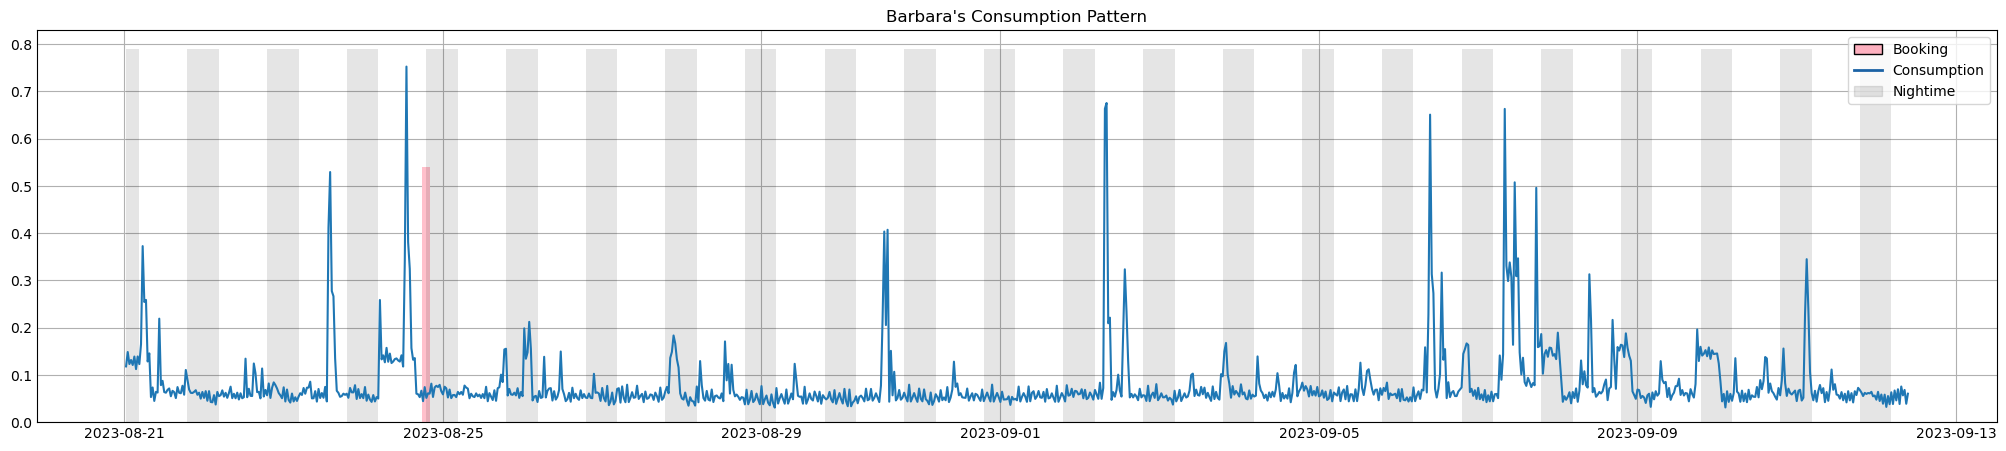

In [54]:
bookings105Barbara = pilotBookings.loc[pilotBookings['user']==14]

fig1, ax = plt.subplots( figsize=(20, 4))
ax.bar(bookings105Barbara['start'],bookings105Barbara['consumption'],color='pink',width=0.1)
ax.plot(consumption105Barbara_coordination['time'],consumption105Barbara_coordination['value'])

# Fill the background to represent nighttime
ax.fill_between(consumption105Barbara_coordination['time'], ax.get_ylim()[0],
                ax.get_ylim()[1],
                where=((consumption105Barbara_coordination['time'].dt.hour >= nighttime_start) |
                       (consumption105Barbara_coordination['time'].dt.hour < nighttime_end)),
                facecolor="#000000", alpha=0.1)

ax.set_title("Barbara's Consumption Pattern")
handles = [Rectangle((0, 0), 1, 1, color="#fdb0bf", ec="k"),
           Line2D([0, 1], [0.5, 0.5], color="#1b62a5", lw=2),
           Rectangle((0, 0), 1, 1, color="#000000", ec="k", alpha=0.1)]
labels = ["Booking", "Consumption", "Nightime"]
plt.legend(handles, labels)

plt.savefig('barbara_consumption.png', dpi=300, bbox_inches='tight')
plt.show()

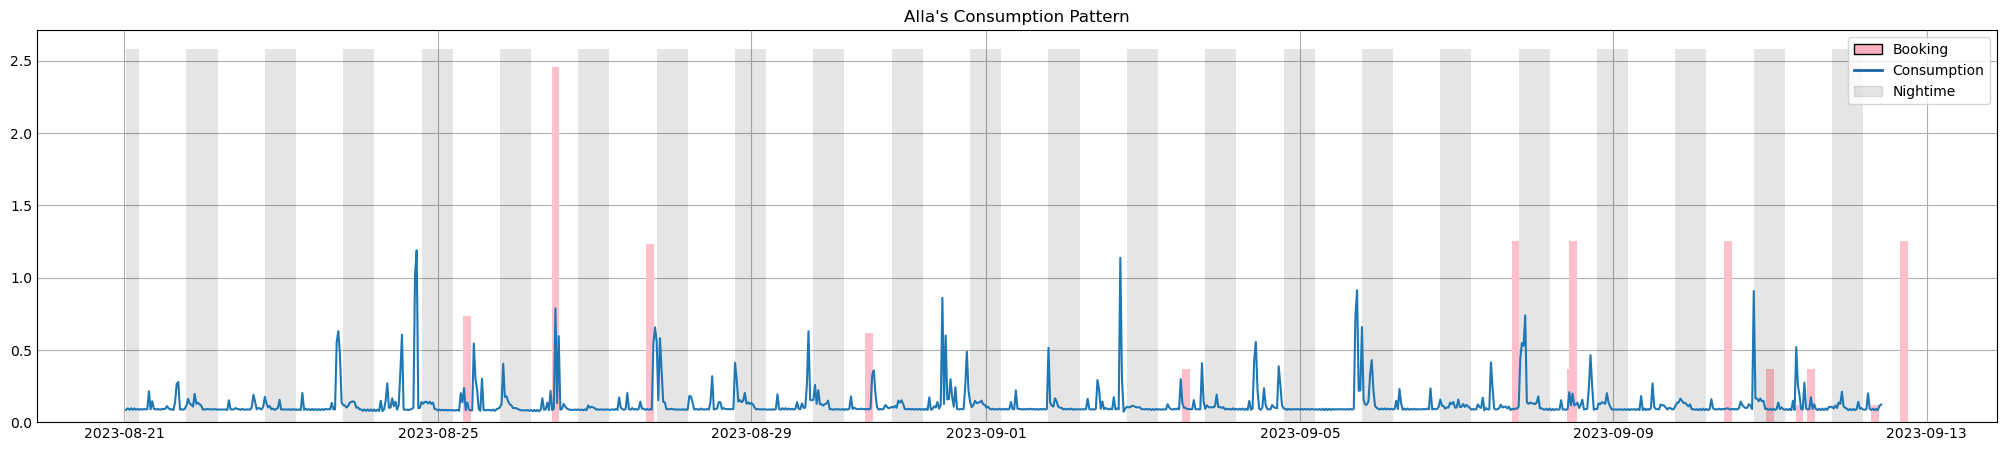

In [55]:
bookings109Alla = pilotBookings.loc[pilotBookings['user']==16]

fig1, ax = plt.subplots( figsize=(20, 4))
ax.bar(bookings109Alla['start'],bookings109Alla['consumption'],color='pink',width=0.1)
ax.plot(consumption109Alla_coordination['time'],consumption109Alla_coordination['value'])

# Fill the background to represent nighttime
ax.fill_between(consumption109Alla_coordination['time'], ax.get_ylim()[0],
                ax.get_ylim()[1],
                where=((consumption109Alla_coordination['time'].dt.hour >= nighttime_start) |
                       (consumption109Alla_coordination['time'].dt.hour < nighttime_end)),
                facecolor="#000000", alpha=0.1)

ax.set_title("Alla's Consumption Pattern")
handles = [Rectangle((0, 0), 1, 1, color="#fdb0bf", ec="k"),
           Line2D([0, 1], [0.5, 0.5], color="#1b62a5", lw=2),
           Rectangle((0, 0), 1, 1, color="#000000", ec="k", alpha=0.1)]
labels = ["Booking", "Consumption", "Nightime"]
plt.legend(handles, labels)

plt.savefig('alla_consumption.png', dpi=300, bbox_inches='tight')
plt.show()

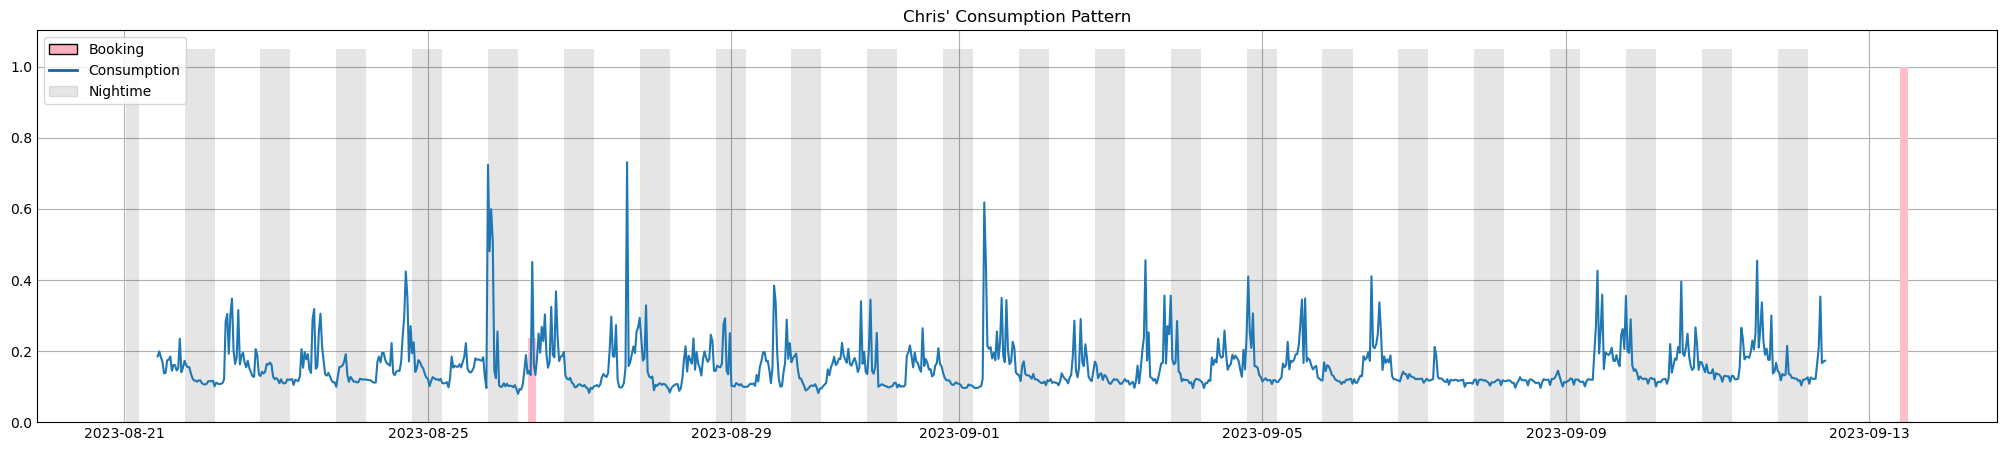

In [56]:
bookings111Chris = pilotBookings.loc[pilotBookings['user']==18]

fig1, ax = plt.subplots( figsize=(20, 4))
ax.bar(bookings111Chris['start'],bookings111Chris['consumption'],color='pink',width=0.1)
ax.plot(consumption111Chris_coordination['time'],consumption111Chris_coordination['value'])

# Fill the background to represent nighttime
ax.fill_between(consumption111Chris_coordination['time'], ax.get_ylim()[0],
                ax.get_ylim()[1],
                where=((consumption111Chris_coordination['time'].dt.hour >= nighttime_start) |
                       (consumption111Chris_coordination['time'].dt.hour < nighttime_end)),
                facecolor="#000000", alpha=0.1)

ax.set_title("Chris' Consumption Pattern")
handles = [Rectangle((0, 0), 1, 1, color="#fdb0bf", ec="k"),
           Line2D([0, 1], [0.5, 0.5], color="#1b62a5", lw=2),
           Rectangle((0, 0), 1, 1, color="#000000", ec="k", alpha=0.1)]
labels = ["Booking", "Consumption", "Nightime"]
plt.legend(handles, labels)

plt.savefig('chris_consumption.png', dpi=300, bbox_inches='tight')
plt.show()

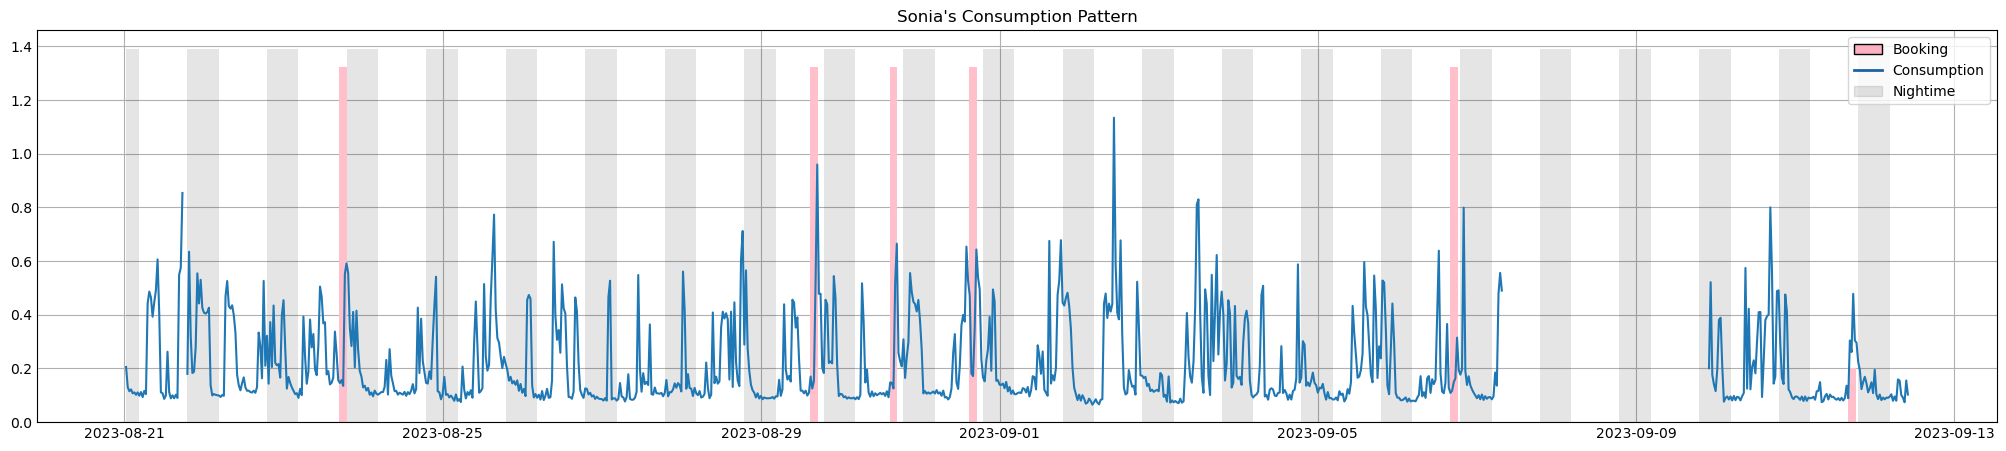

In [57]:
bookings110Sonia = pilotBookings.loc[pilotBookings['user']==13]

fig1, ax = plt.subplots( figsize=(20, 4))
ax.bar(bookings110Sonia['start'],bookings110Sonia['consumption'],color='pink',width=0.1)
ax.plot(consumptionSonia110_coordination['time'],consumptionSonia110_coordination['value'])

# Fill the background to represent nighttime
ax.fill_between(consumptionSonia110_coordination['time'], ax.get_ylim()[0],
                ax.get_ylim()[1],
                where=((consumptionSonia110_coordination['time'].dt.hour >= nighttime_start) |
                       (consumptionSonia110_coordination['time'].dt.hour < nighttime_end)),
                facecolor="#000000", alpha=0.1)


ax.set_title("Sonia's Consumption Pattern")
# ax.set_xlim(consumptionSonia110_coordination['time'].min(), consumptionSonia110_coordination['time'].max() + pd.Timedelta(hours=40))

handles = [Rectangle((0, 0), 1, 1, color="#fdb0bf", ec="k"),
           Line2D([0, 1], [0.5, 0.5], color="#1b62a5", lw=2),
           Rectangle((0, 0), 1, 1, color="#000000", ec="k", alpha=0.1)]
labels = ["Booking", "Consumption", "Nightime"]
plt.legend(handles, labels)

plt.savefig('sonia_consumption.png', dpi=300, bbox_inches='tight')
plt.show()